# <font color="#347797">Train a Smartcab How to Drive</font>

A smartcab is a self-driving car from the not-so-distant future that ferries people from one arbitrary location to another. In this project, you will use reinforcement learning to train a smartcab how to drive.

## Environment

Your smartcab operates in an idealized grid-like city, with roads going North-South and East-West. Other vehicles may be present on the roads, but no pedestrians. There is a traffic light at each intersection that can be in one of two states: North-South open or East-West open.

US right-of-way rules apply: On a green light, you can turn left only if there is no oncoming traffic at the intersection coming straight. On a red light, you can turn right if there is no oncoming traffic turning left or traffic from the left going straight.

To understand how to correctly yield to oncoming traffic when turning left, you may refer to this [official drivers’ education video](https://www.youtube.com/watch?v=TW0Eq2Q-9Ac), or this [passionate exposition](https://www.youtube.com/watch?v=0EdkxI6NeuA).

## Inputs

Assume that a higher-level planner assigns a route to the smartcab, splitting it into waypoints at each intersection. And time in this world is quantized. At any instant, the smartcab is at some intersection. Therefore, the next waypoint is always either one block straight ahead, one block left, one block right, one block back or exactly there (reached the destination).

The smartcab only has an egocentric view of the intersection it is currently at (sorry, no accurate GPS, no global location). It is able to sense whether the traffic light is green for its direction of movement (heading), and whether there is a car at the intersection on each of the incoming roadways (and which direction they are trying to go).

In addition to this, each trip has an associated timer that counts down every time step. If the timer is at 0 and the destination has not been reached, the trip is over, and a new one may start.

## Outputs

At any instant, the smartcab can either stay put at the current intersection, move one block forward, one block left, or one block right (no backward movement).

## Rewards

The smartcab gets a reward for each successfully completed trip. A trip is considered “successfully completed” if the passenger is dropped off at the desired destination (some intersection) within a pre-specified time bound (computed with a route plan).

It also gets a smaller reward for each correct move executed at an intersection. It gets a small penalty for an incorrect move, and a larger penalty for violating traffic rules and/or causing an accident.

## Goal

Design the AI driving agent for the smartcab. It should receive the above-mentioned inputs at each time step t, and generate an output move. Based on the rewards and penalties it gets, the agent should learn an optimal policy for driving on city roads, obeying traffic rules correctly, and trying to reach the destination within a goal time.


# <font color="#347797">Tasks</font>

Download [smartcab.zip](https://s3.amazonaws.com/content.udacity-data.com/courses/nd009/projects/smartcab.zip), unzip and open the template Python file agent.py (do not modify any other file). Perform the following tasks to build your agent, referring to instructions mentioned in README.md as well as inline comments in agent.py.

Also create a project report (e.g. Word or Google doc), and start addressing the questions indicated in italics below. When you have finished the project, save/download the report as a PDF and turn it in with your code.

## Implement a basic driving agent

Implement the basic driving agent, which processes the following inputs at each time step:

- Next waypoint location, relative to its current location and heading,
- Intersection state (traffic light and presence of cars), and,
- Current deadline value (time steps remaining),

And produces some random move/action (None, 'forward', 'left', 'right'). Don’t try to implement the correct strategy! That’s exactly what your agent is supposed to learn.

Run this agent within the simulation environment with enforce_deadline set to False (see run function in agent.py), and observe how it performs. In this mode, the agent is given unlimited time to reach the destination. The current state, action taken by your agent and reward/penalty earned are shown in the simulator.

*In your report, mention what you see in the agent’s behavior. Does it eventually make it to the target location?*

### Answer

We are producing a random move/action from the valid actions of the environment. The simulation can only produce a random walk until it accidentally falls on the destination. It doesn't matter what is the next waypoint, the current intersection state or the current deadline value, we are producing a random action.

## Identify and update state

Identify a set of states that you think are appropriate for modeling the driving agent. The main source of state variables are current inputs, but not all of them may be worth representing. Also, you can choose to explicitly define states, or use some combination (vector) of inputs as an implicit state.

At each time step, process the inputs and update the current state. Run it again (and as often as you need) to observe how the reported state changes through the run.

*Justify why you picked these set of states, and how they model the agent and its environment.* 

###  Answer

I have chosen to use in my state:
- the next way point in the state as a way to get to the destination. The GPS telling you what is the next step. Otherwise the agent has no idea where to go. This gives the agent a purpose in life.
- I have put the light as another factor so it learns that going through a red light is bad.
- Direction of the surrounding traffic would also be important in order to respect the rules of driving. But the rewards are independant from that it plays no role in the state.

## Implement Q-Learning

Implement the Q-Learning algorithm by initializing and updating a table/mapping of Q-values at each time step. Now, instead of randomly selecting an action, pick the best action available from the current state based on Q-values, and return that.

Each action generates a corresponding numeric reward or penalty (which may be zero). Your agent should take this into account when updating Q-values. Run it again, and observe the behavior.

*What changes do you notice in the agent’s behavior?*

### Answer

The agent is pretty much always choosing to turn right or do nothing. None always gives a +1 reward, it's generally a better reward than anything else. It's a safe choice reward-wise. 

Because there is no time limit turning right is always a valid choice as well (move_okay = True in the code when it's right) and gives a positive reward but less than doing nothing. So right is never a bad choice. Left and forward sometimes give negative rewards so it ends up not being choosen very often.

## Enhance the driving agent

Apply the reinforcement learning techniques you have learnt, and tweak the parameters (e.g. learning rate, discount factor, action selection method, etc.), to improve the performance of your agent. Your goal is to get it to a point so that within 100 trials, the agent is able to learn a feasible policy - i.e. reach the destination within the allotted time, with net reward remaining positive.

*Report what changes you made to your basic implementation of Q-Learning to achieve the final version of the agent. How well does it perform?*

### Anwser

- I implemented a GLIE strategy with the Botlzmann Exploration [section 2.2.2](http://www.cs.cmu.edu/afs/cs/project/jair/pub/volume4/kaelbling96a.pdf) to choose the action according to their respective probabilities
- Learning rate has been set to 1/t
- Discount is 0.8. I have tried many different discount values (maybe to the point of over fitting) and this one gives among the best results if we look at the number of wrong decisions the agent makes over time.

Exploration vs Exploitation is working, we can see on the following graphic that we explore less and less over time.

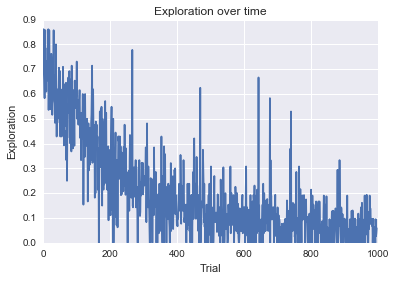

In [2]:
from IPython.display import Image
Image('exploration.png')

*Does your agent get close to finding an optimal policy, i.e. reach the destination in the minimum possible time, and not incur any penalties?*

### Answer

I ran 1000 simulations while keeping track of a two metrics. Number of times it successfully reached the destination and the number of wrong moves it makes over time.

After 100 trials it reaches the destination most of the time. On many of my runs the last 10 trials looked like this
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1] where 1 is a success. 

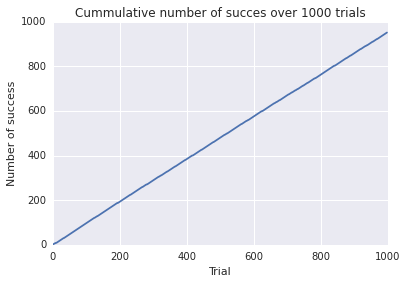

In [3]:
Image('success.png')

Looking at the number of wrong moves the agent makes over time it rapidly decrease and the elbow is around 100.

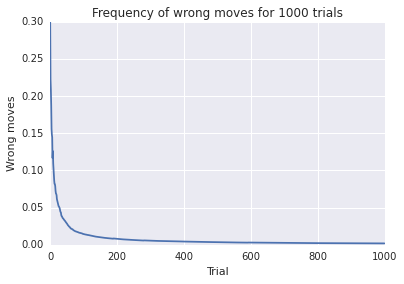

In [4]:
Image('Wrong move.png')

### Next step

One possible next step is to play more with the GLIE. I have choosen a Boltzmann exploration and changing the temperature over time might help. Decreasing it will encourage more explotation. I tried with $\exp\left(\frac{-\#\ trials}{z}\right)$ where I varied z between 50 and 100. The result were really bad though. A variation on that theme may help with the peformances staying good towards the end.

Because the state only uses two values (light and next waypoint) we have a total number of combination of 2*3=6. It's really quick to visit every state a couple of times and learn the optimal policy.
A more complex system would also use the surrounding traffic and possibly the deadline as well to give the agent a sense of emergency.